# Importing our libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from prophet import Prophet

plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = '9525c360af4b68c19c4cb9504ebb9b3e'

# Lets start by getting some S&P500 data


In [196]:
fred = Fred(api_key = fred_key)

In [197]:
#Using the Fred api to search the records for anything to do with the S&P
fred.search('S&P')

id realtime_start realtime_end  \
series id                                                        
SP500                        SP500     2023-07-02   2023-07-02   
VXVCLS                      VXVCLS     2023-07-02   2023-07-02   
VXOCLS                      VXOCLS     2023-07-02   2023-07-02   
CSUSHPINSA              CSUSHPINSA     2023-07-02   2023-07-02   
CSUSHPISA                CSUSHPISA     2023-07-02   2023-07-02   
...                            ...            ...          ...   
CRDQHKBPABIS          CRDQHKBPABIS     2023-07-02   2023-07-02   
CSHGCPIRA156NRUG  CSHGCPIRA156NRUG     2023-07-02   2023-07-02   
CRDQCZBPUBIS          CRDQCZBPUBIS     2023-07-02   2023-07-02   
CSHRCPTRA156NRUG  CSHRCPTRA156NRUG     2023-07-02   2023-07-02   
CSHRCPCHA156NRUG  CSHRCPCHA156NRUG     2023-07-02   2023-07-02   

                                                              title  \
series id                                                             
SP500                                                       S&P 500   
VXVCLS                        CBOE S&P 500 3-Month Volatility Index   
VXOCLS            CBOE S&P 100 Volatility Index: VXO (DISCONTINUED)   
CSUSHPINSA          S&P/Case-Shiller U.S. National Home Price Index   
CSUSHPISA           S&P/Case-Shiller U.S. National Home Price Index   
...                                                             ...   
CRDQHKBPABIS      Credit to Private Non-Financial Sector by Dome...   
CSHGCPIRA156NRUG  Share of Government Consumption at Current Pur...   
CRDQCZBPUBIS      Credit to Private Non-Financial Sector by Dome...   
CSHRCPTRA156NRUG  Share of Residual Trade and GDP Statistical Di...   
CSHRCPCHA156NRUG  Share of Residual Trade and GDP Statistical Di...   

                 observation_start observation_end                  frequency  \
series id                                                                       
SP500                   2013-07-01      2023-06-30               Daily, Close   
VXVCLS                  2007-12-04      2023-06-29               Daily, Close   
VXOCLS                  1986-01-02      2021-09-23               Daily, Close   
CSUSHPINSA              1987-01-01      2023-04-01                    Monthly   
CSUSHPISA               1987-01-01      2023-04-01                    Monthly   
...                            ...             ...                        ...   
CRDQHKBPABIS            1978-10-01      2022-10-01  Quarterly, End of Quarter   
CSHGCPIRA156NRUG        1955-01-01      2019-01-01                     Annual   
CRDQCZBPUBIS            1993-01-01      2022-10-01  Quarterly, End of Quarter   
CSHRCPTRA156NRUG        1950-01-01      2019-01-01                     Annual   
CSHRCPCHA156NRUG        1950-01-01      2019-01-01                     Annual   

                 frequency_short                          units  \
series id                                                         
SP500                          D                          Index   
VXVCLS                         D                          Index   
VXOCLS                         D                          Index   
CSUSHPINSA                     M             Index Jan 2000=100   
CSUSHPISA                      M             Index Jan 2000=100   
...                          ...                            ...   
CRDQHKBPABIS                   Q  Billions of Hong Kong Dollars   
CSHGCPIRA156NRUG               A                        Percent   
CRDQCZBPUBIS                   Q       Billions of Czech Koruny   
CSHRCPTRA156NRUG               A                        Percent   
CSHRCPCHA156NRUG               A                        Percent   

                           units_short      seasonal_adjustment  \
series id                                                         
SP500                            Index  Not Seasonally Adjusted   
VXVCLS                           Index  Not Seasonally Adjusted   
VXOCLS                           Index  Not Seasonally 

In [198]:
#Getting the data we want
sp500 = fred.get_series(series_id = 'SP500')

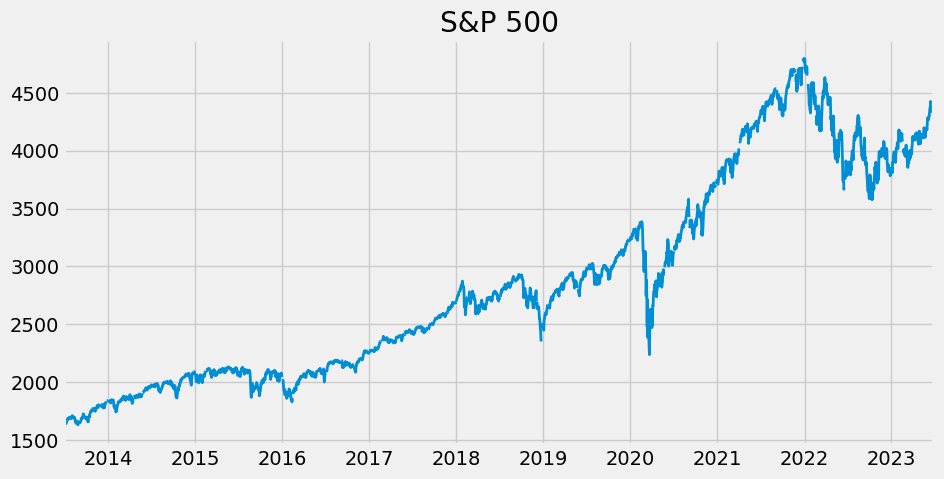

In [199]:
sp500.plot(figsize = (10, 5), title = "S&P 500", lw = 2);

# Prophet Model

In [200]:
#Changing the column labels to match Prophet's requirements

sp500df = pd.DataFrame(data=sp500).reset_index()
sp500df.columns.values[0] = "ds"
sp500df.columns.values[1] = "y"

#Filtering data to train the model only on years 2017 and beyond
sp500train = sp500df[sp500df.ds.dt.year > 2017]

In [201]:
model = Prophet(interval_width = .95)
model.add_country_holidays(country_name = 'US')
model.fit(sp500train)


16:42:12 - cmdstanpy - INFO - Chain [1] start processing
16:42:13 - cmdstanpy - INFO - Chain [1] done processing


In [268]:
future = model.make_future_dataframe(periods = 60)
forecast = model.predict(future)


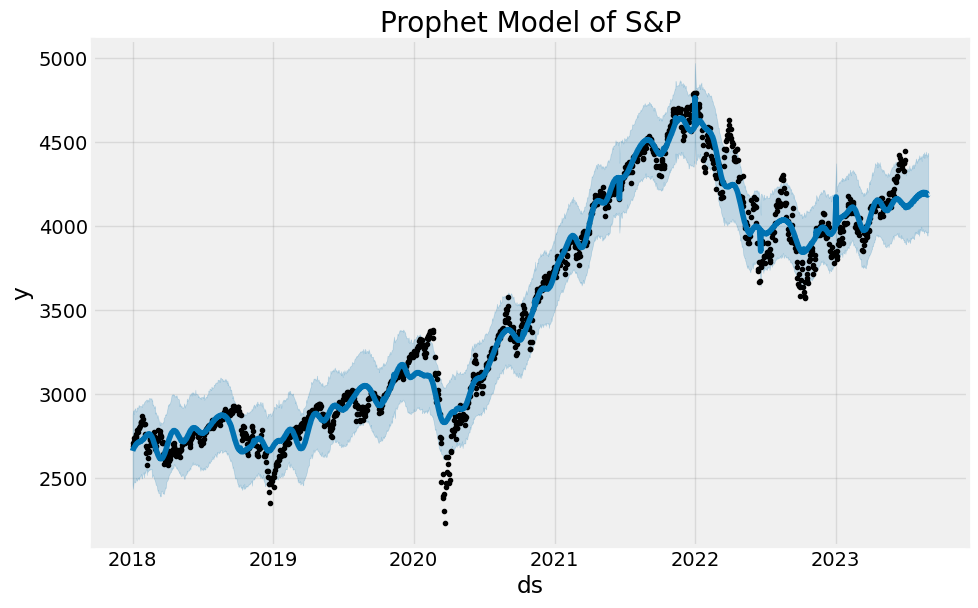

In [278]:
model.plot(forecast);
plt.title("Prophet Model of S&P");


# Lets Look at Unemployment Now

In [204]:
fred.search('unemployment')

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2023-07-02   2023-07-02   
UNRATENSA                          UNRATENSA     2023-07-02   2023-07-02   
CCSA                                    CCSA     2023-07-02   2023-07-02   
CCNSA                                  CCNSA     2023-07-02   2023-07-02   
NROU                                    NROU     2023-07-02   2023-07-02   
...                                      ...            ...          ...   
SLUEM1524ZSSLB                SLUEM1524ZSSLB     2023-07-02   2023-07-02   
SLUEM1524ZSMYS                SLUEM1524ZSMYS     2023-07-02   2023-07-02   
SLUEM1524ZSTHA                SLUEM1524ZSTHA     2023-07-02   2023-07-02   
SLUEM1524ZSJPN                SLUEM1524ZSJPN     2023-07-02   2023-07-02   
LAURD860000000000004A  LAURD860000000000004A     2023-07-02   2023-07-02   

                                                                   title  \
series id                                                                  
UNRATE                                                 Unemployment Rate   
UNRATENSA                                              Unemployment Rate   
CCSA                             Continued Claims (Insured Unemployment)   
CCNSA                            Continued Claims (Insured Unemployment)   
NROU                                    Noncyclical Rate of Unemployment   
...                                                                  ...   
SLUEM1524ZSSLB           Youth Unemployment Rate for the Solomon Islands   
SLUEM1524ZSMYS                      Youth Unemployment Rate for Malaysia   
SLUEM1524ZSTHA                      Youth Unemployment Rate for Thailand   
SLUEM1524ZSJPN                         Youth Unemployment Rate for Japan   
LAURD860000000000004A  Unemployed Persons in East South Central Censu...   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2023-05-01   
UNRATENSA                    1948-01-01      2023-05-01   
CCSA                         1967-01-07      2023-06-17   
CCNSA                        1967-01-07      2023-06-17   
NROU                         1949-01-01      2033-10-01   
...                                 ...             ...   
SLUEM1524ZSSLB               1991-01-01      2022-01-01   
SLUEM1524ZSMYS               1991-01-01      2022-01-01   
SLUEM1524ZSTHA               1991-01-01      2022-01-01   
SLUEM1524ZSJPN               1991-01-01      2022-01-01   
LAURD860000000000004A        1976-01-01      2022-01-01   

                                     frequency frequency_short    units  \
series id                                                                 
UNRATE                                 Monthly               M  Percent   
UNRATENSA                              Monthly               M  Percent   
CCSA                   Weekly, Ending Saturday               W   Number   
CCNSA                  Weekly, Ending Saturday               W   Number   
NROU                                 Quarterly               Q  Percent   
...                                        ...             ...      ...   
SLUEM1524ZSSLB                          Annual               A  Percent   
SLUEM1524ZSMYS                          Annual               A  Percent   
SLUEM1524ZSTHA                          Annual               A  Percent   
SLUEM1524ZSJPN                          Annual               A  Percent   
LAURD860000000000004A                   Annual               A  Persons   

                      units_short      seasonal_adjustment  \
series id                                                    
UNRATE                          %      Seasonally Adjusted   
UNRATENSA                       %  Not Seasonally Adjusted   
CCSA                       Number      Seasonally Adjusted   
CCNSA     

In [205]:
unrate = fred.get_series('UNRATE')

In [206]:
unemp_df = fred.search('unemployment state', filter = ('frequency', 'Monthly'))

In [207]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [260]:
#All of this allows us to get unemployment rate for individual states
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]


In [209]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)
    

In [210]:
print(len(all_results))
print(unemp_df.shape)
#all values accounted for

60
(60, 15)


In [230]:
#Need to drop columns that arent state unemployment rates
unemp_states = pd.concat(all_results, axis=1).drop(['LASMT261982000000003', 'LASMT391746000000003', 'USAURAMS','CNEWUR','CNERUR','CSOUUR','CWSTUR', 'CMWRUR','PRUR'], axis = 1)

In [282]:
#Renaming columns to be more human-readable
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()

unemp_states.rename(columns=id_to_state, inplace=True)


In [281]:
px.line(unemp_states)



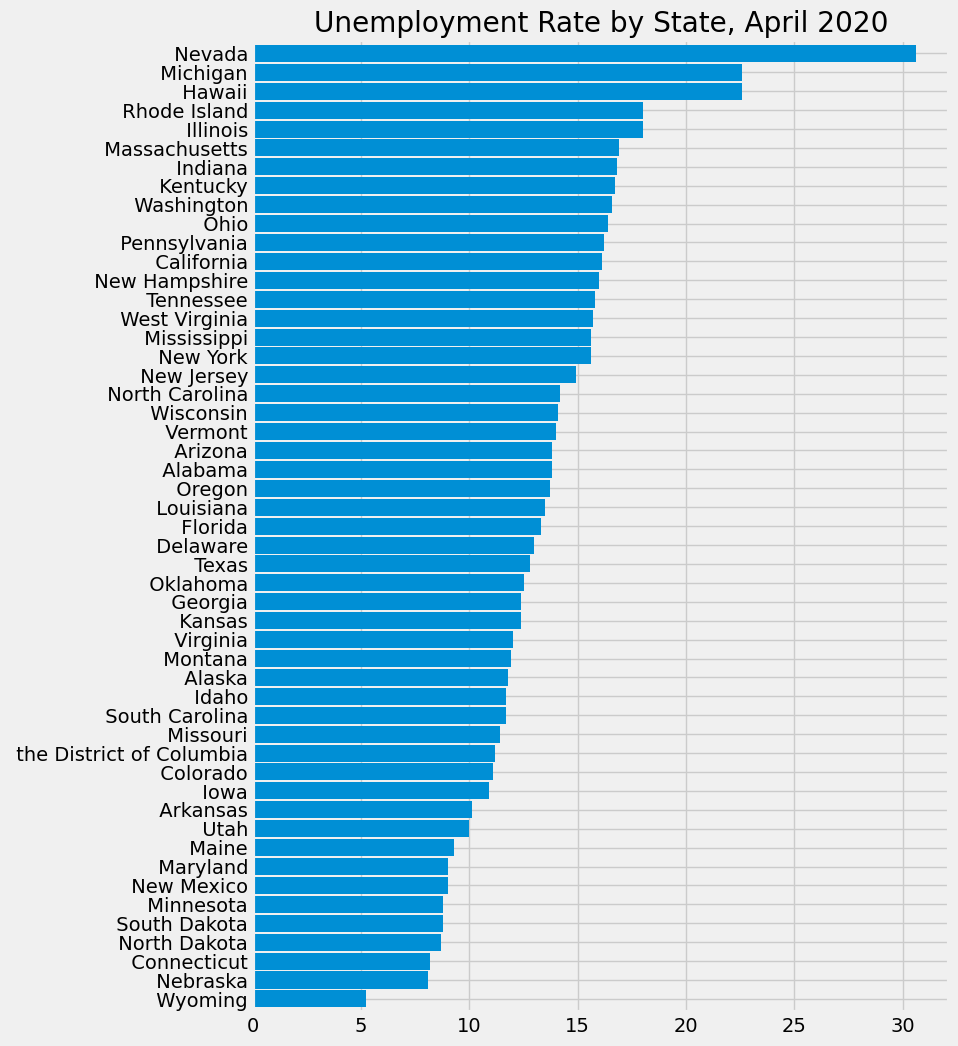

In [214]:

ax = unemp_states.loc[uemp_states.index == '2020-04-01'].T.sort_values('2020-04-01').plot(kind='barh', width = .9, figsize=(8,12), title = 'Unemployment Rate by State, April 2020')
ax.legend().remove()


# Pulling Labor Force Participation Data

In [215]:
part_df = fred.search('labor force participation rate for states', filter = ('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [225]:
part_states = part_df.loc[part_df['title'].str.contains("Labor Force Participation Rate for")]
part_id_to_state = part_states['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()


In [226]:
all_result2 = []

for myid in part_states.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_result2.append(results)
    
part_states=pd.concat(all_result2, axis=1)


In [227]:
part_states.rename(columns=part_id_to_state, inplace=True)

# Unemployment Rate vs Participation Rate

In [228]:
#Unemployment vs Participation

In [253]:
#Fix DC
unemp_states = unemp_states.rename(columns = {'the District of Columbia':'District of Columbia'})


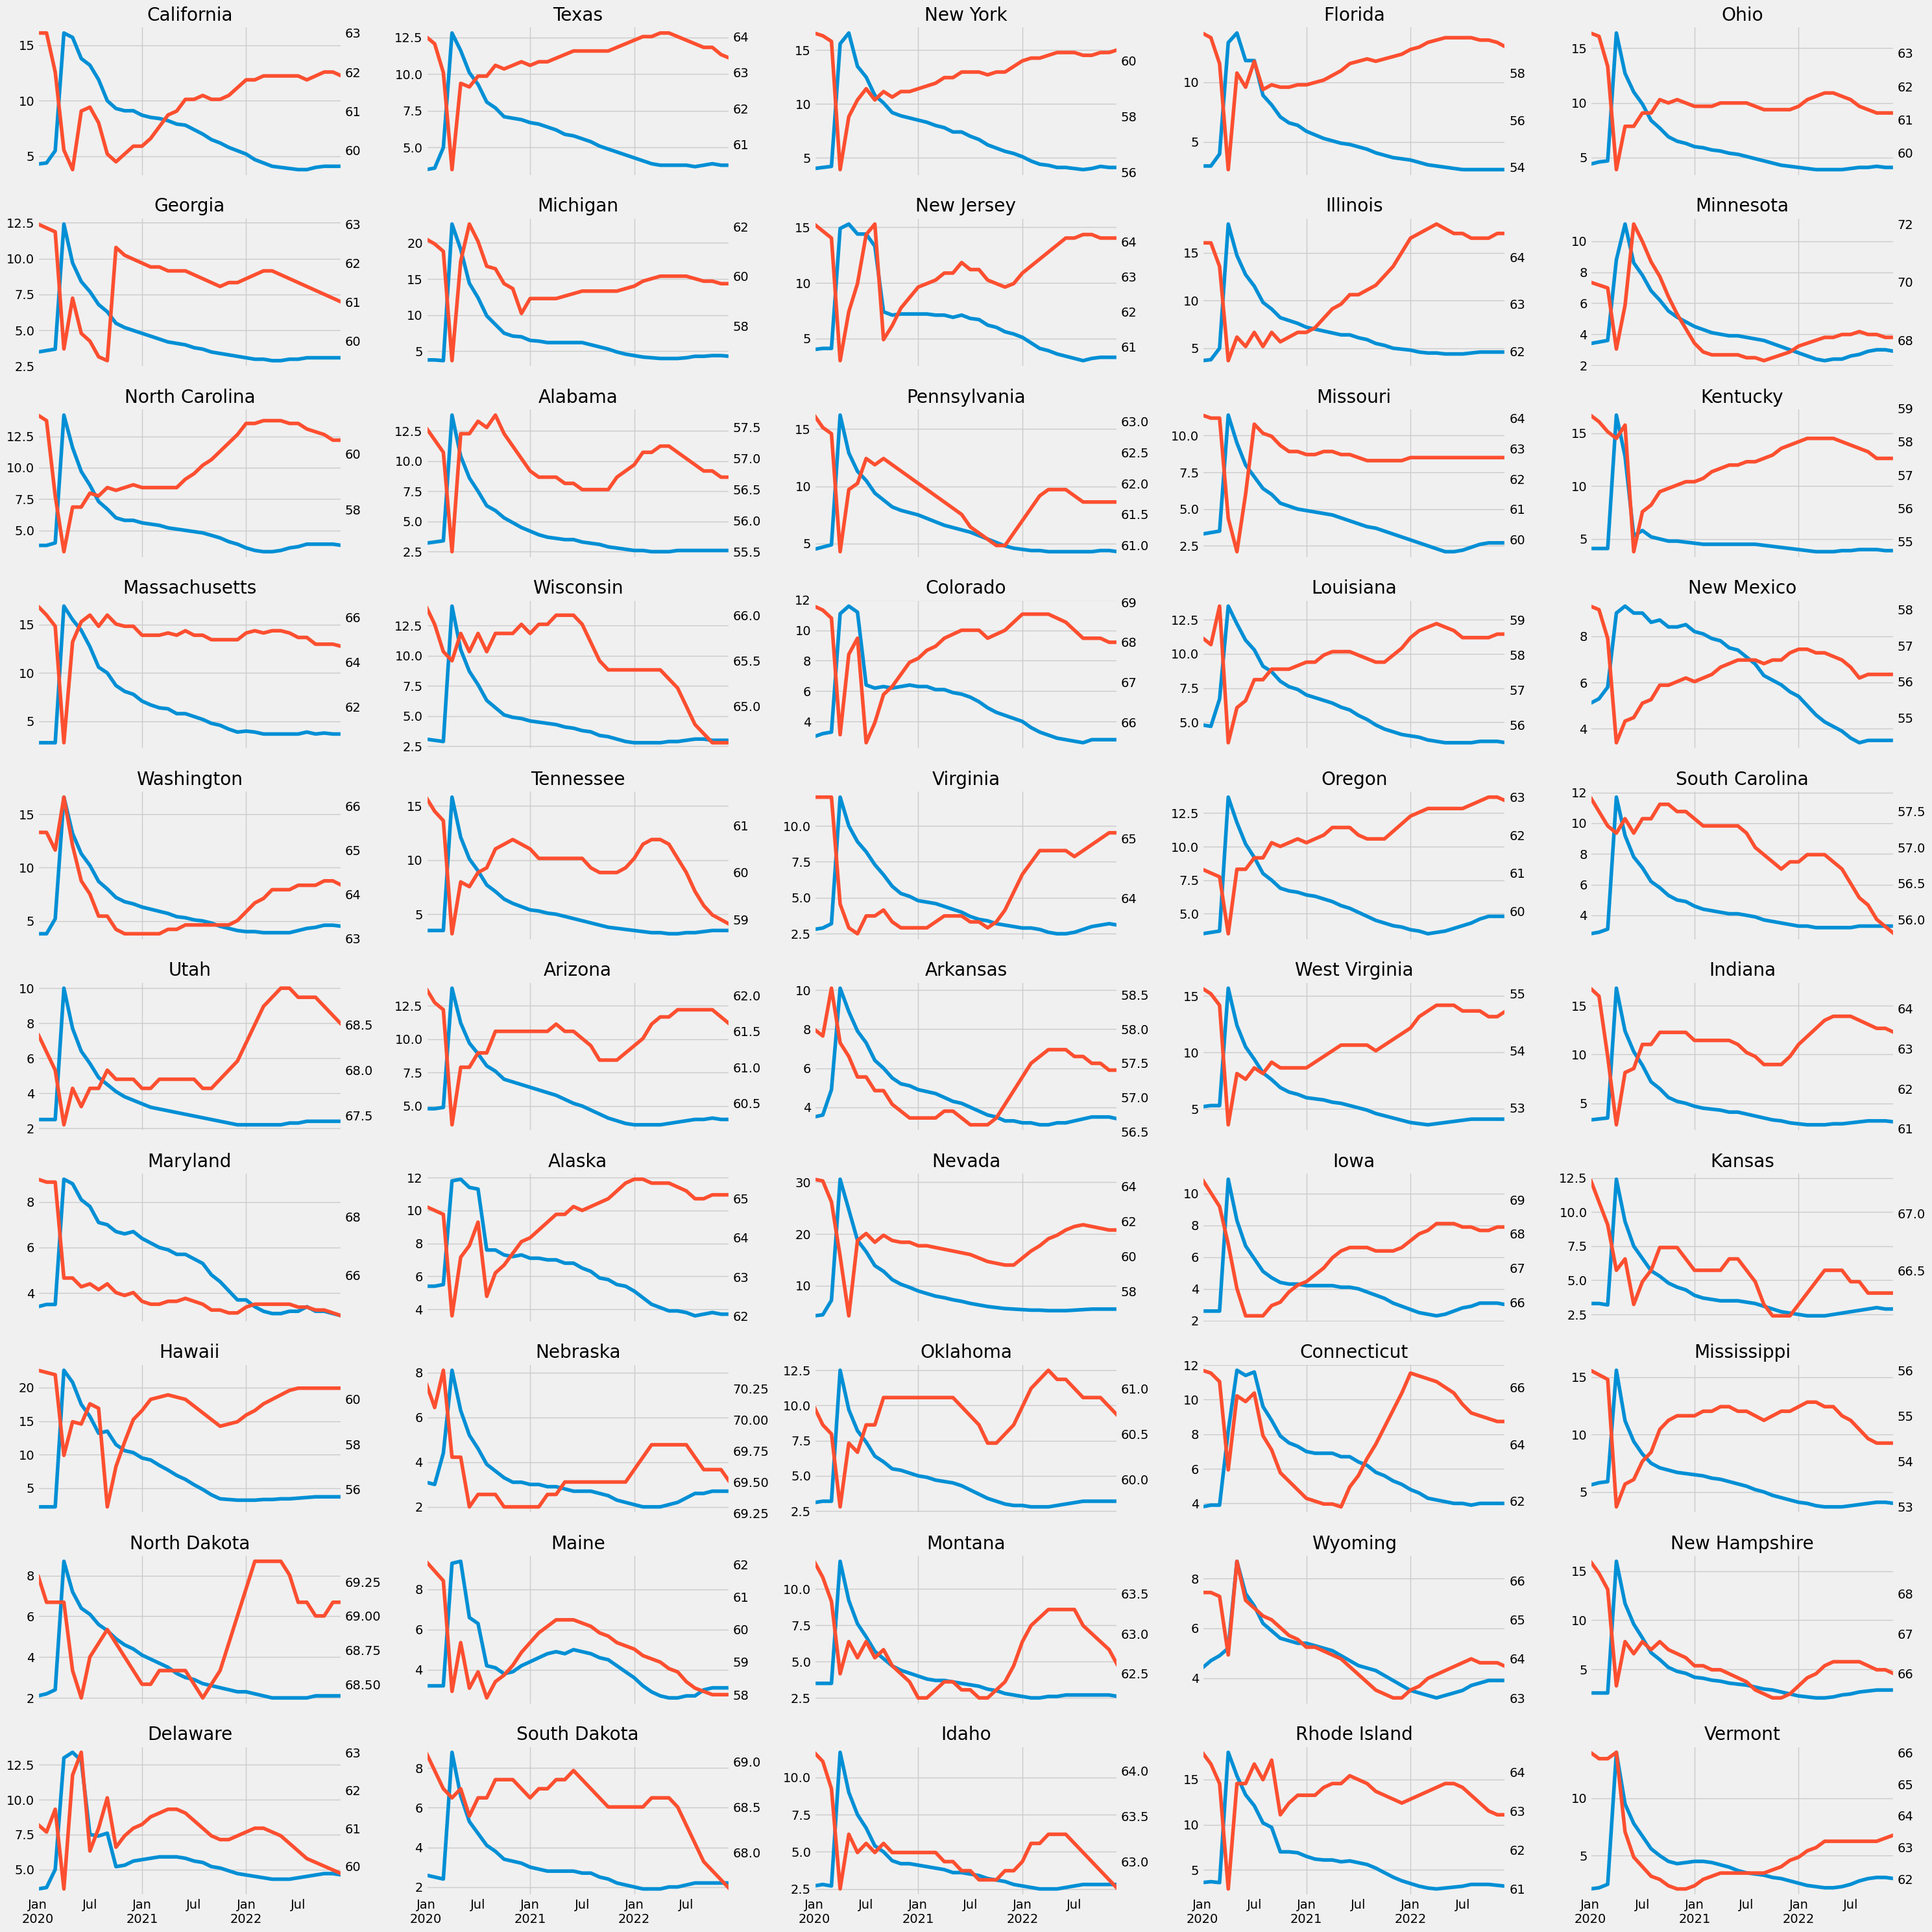

In [258]:
fig, axs = plt.subplots(10, 5, figsize=(30,30), sharex= True)
axs = axs.flatten()

i=0
for state in unemp_states.columns:
    if state == 'District of Columbia':
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2023')[state].plot(ax = axs[i], label = 'Unemployment')
    part_states.query('index >= 2020 and index < 2023')[state].plot(ax = ax2, label='Participation', color = color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
    
plt.tight_layout()
plt.show()

Looking at the plots above we can see that across the board Labor Force Participation Rates have not recovered to their prepandemic levels.


A high Labor Force Participation Rate and low Unemployment Rate speaks to a more robust job market and economy. It seems that, with the exception of outliers, the states that had more restrictions/lockdowns during covid did not recover as fast (and have not prospered as much) as less restrictive states post pandemic.